# Student Data Cleaning and EDA

This notebook covers data cleaning, missing value handling, and outlier detection for the provided student dataset.



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('bi.csv',encoding="latin1") # i have tried multiple encoding until this works 
df.head()

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59.0,55
1,Alex,Walekhwa,60,M,Kenya,Private,79,Diploma,150,60.0,75
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,HighSchool,130,74.0,50
3,Shoni,Hlongwane,22,F,Rsa,Sognsvann,40,High School,120,NaN,44
4,Maria,Kedibone,23,Female,South Africa,Sognsvann,65,High School,122,91.0,80


## Part 1 – Data Cleaning
### Dataset Structure

In [2]:
print(df.shape)
print()
print(df.info())
print()
df.describe(include='all')

(77, 11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fNAME          77 non-null     object 
 1   lNAME          77 non-null     object 
 2   Age            77 non-null     int64  
 3   gender         77 non-null     object 
 4   country        77 non-null     object 
 5   residence      77 non-null     object 
 6   entryEXAM      77 non-null     int64  
 7   prevEducation  77 non-null     object 
 8   studyHOURS     77 non-null     int64  
 9   Python         75 non-null     float64
 10  DB             77 non-null     int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 6.7+ KB
None



,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
count,77,77,77.000000,77,77,77,77.000000,77,77.000000,75.000000,77.000000
unique,71,66,NaN,6,16,6,NaN,10,NaN,NaN,NaN
top,Grethe,Olsen,NaN,Female,Norway,Private,NaN,Bachelors,NaN,NaN,NaN
freq,2,2,NaN,41,47,33,NaN,24,NaN,NaN,NaN
mean,NaN,NaN,35.207792,NaN,NaN,NaN,76.753247,NaN,149.714286,75.853333,69.467532
std,NaN,NaN,10.341966,NaN,NaN,NaN,16.475784,NaN,12.743272,15.410328,17.033701
min,NaN,NaN,21.000000,NaN,NaN,NaN,28.000000,NaN,114.000000,15.000000,30.000000
25%,NaN,NaN,27.000000,NaN,NaN,NaN,69.000000,NaN,144.000000,71.000000,56.000000
50%,NaN,NaN,33.000000,NaN,NaN,NaN,80.000000,NaN,156.000000,81.000000,71.000000
75%,NaN,NaN,42.000000,NaN,NaN,NaN,90.000000,NaN,158.000000,85.000000,83.000000


### Question: Which columns should be categorical and which should be numerical?

**Categorical Columns:**  
- fNAME, lNAME, gender, country, residence, prevEducation  

**Numerical Columns:**  
- Age, entryEXAM, studyHOURS, Python, DB  

### Detect and Fix Inconsistent Categories

In [3]:
print(df['gender'].unique())
print(df['country'].unique())
print(df['prevEducation'].unique())


['Female' 'M' 'Male' 'F' 'female' 'male']
['Norway' 'Kenya' 'Uganda' 'Rsa' 'South Africa' 'Norge' 'norway' 'Denmark'
 'Netherlands' 'Italy' 'Spain' 'UK' 'Somali' 'Nigeria' 'Germany' 'France']
['Masters' 'Diploma' 'HighSchool' 'High School' 'Bachelors' 'Barrrchelors'
 'diploma' 'DIPLOMA' 'Diplomaaa' 'Doctorate']


In [4]:
# Standardize gender

df["gender"] = df["gender"].str.strip().str.lower()
df['gender'].unique()
df["gender"] = df["gender"].replace({
    "f": "Female",
    "female": "Female",
    "m": "Male",
    "male": "Male"
})
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [5]:
# Standardize country

df["country"] = df["country"].str.strip().str.title()
df["country"].unique()

df["country"] = df["country"].replace({
    "Norge": "Norway",
    "Rsa": "South Africa",
    "Uk": "United Kingdom",
    "Somali": "Somalia"
})
df["country"].unique()

array(['Norway', 'Kenya', 'Uganda', 'South Africa', 'Denmark',
       'Netherlands', 'Italy', 'Spain', 'United Kingdom', 'Somalia',
       'Nigeria', 'Germany', 'France'], dtype=object)

In [6]:
# Fix prevEducation typos

df["prevEducation"] = df["prevEducation"].str.strip().str.title()

# Fix typos and variations
df["prevEducation"] = df["prevEducation"].replace({
    "HighSchool": "High School",
    "Highschool": "High School",
    "High School": "High School",
    "diploma": "Diploma",
    "DIPLOMA": "Diploma",
    "Diplomaaa": "Diploma",
    "Barrrchelors": "Bachelors",
    "Bachelors": "Bachelors",
    "Masters": "Masters",
    "Doctorate": "Doctorate"
})

df["prevEducation"].unique()

array(['Masters', 'Diploma', 'High School', 'Bachelors', 'Doctorate'],
      dtype=object)

In [7]:
df[['gender','country','prevEducation']].head()

,gender,country,prevEducation
0,Female,Norway,Masters
1,Male,Kenya,Diploma
2,Male,Uganda,High School
3,Female,South Africa,High School
4,Female,South Africa,High School


### Handle Duplicates

In [8]:
print('Duplicates:', df.duplicated().sum())
df = df.drop_duplicates()


Duplicates: 0



## Part 2 – Missing Data


In [9]:
df.isnull().sum()


fNAME            0
lNAME            0
Age              0
gender           0
country          0
residence        0
entryEXAM        0
prevEducation    0
studyHOURS       0
Python           2
DB               0
dtype: int64

In [10]:
df

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59.0,55
1,Alex,Walekhwa,60,Male,Kenya,Private,79,Diploma,150,60.0,75
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,High School,130,74.0,50
3,Shoni,Hlongwane,22,Female,South Africa,Sognsvann,40,High School,120,NaN,44
4,Maria,Kedibone,23,Female,South Africa,Sognsvann,65,High School,122,91.0,80
...,...,...,...,...,...,...,...,...,...,...,...
72,Clara,Bernard,43,Female,France,Private,80,Bachelors,150,75.0,43
73,Julian,Nielsen,31,Male,Denmark,Sognsvann,90,Masters,158,84.0,83
74,Sophie,Brown,33,Female,United Kingdom,Sognsvann,96,Masters,158,85.0,90
75,Leon,Bauer,35,Male,Germany,Sognsvann,90,Masters,160,87.0,74


# Question: Which columns are most affected by missing values?

**Answer** : The Python column is the most affected by missing values.

In [11]:
# Fill missing numerical values with mean
df['Python'] = df['Python'].fillna(df['Python'].mean())


# Fill categorical with mode 
for col in ['gender','country']:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mode()[0])

df.isnull().sum()

fNAME            0
lNAME            0
Age              0
gender           0
country          0
residence        0
entryEXAM        0
prevEducation    0
studyHOURS       0
Python           0
DB               0
dtype: int64

## Part 3 – Outliers

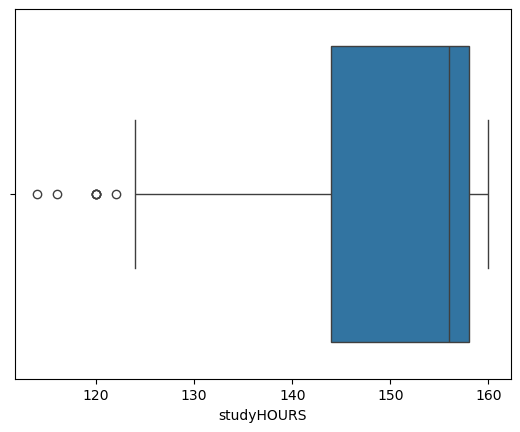

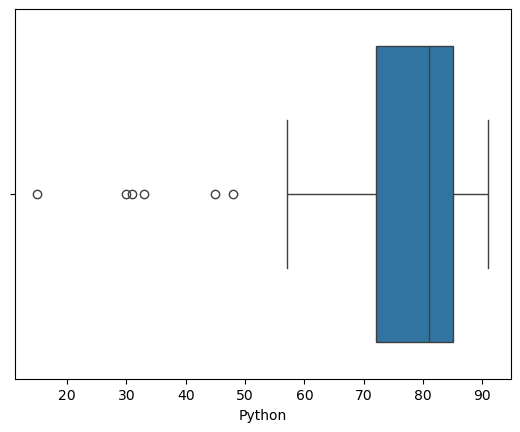

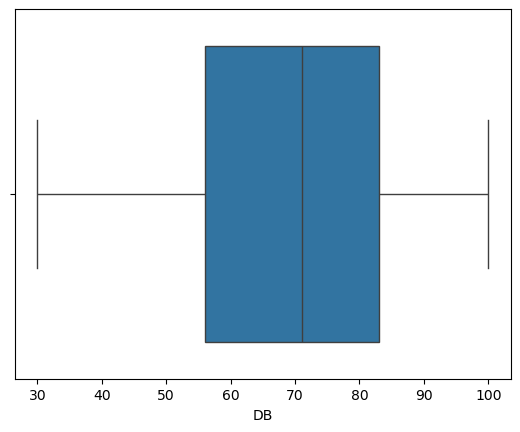

In [12]:
sns.boxplot(x=df['studyHOURS'])
plt.show()
sns.boxplot(x=df['Python'])
plt.show()
sns.boxplot(x=df['DB'])
plt.show()

In [13]:
# Remove unrealistic scores (<0 or >100)
df = df[(df['Python'].between(0,100)) & (df['DB'].between(0,100))]

df.shape

(77, 11)

In [14]:
# IQR method for studyHOURS
Q1 = df['studyHOURS'].quantile(0.25)
Q3 = df['studyHOURS'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
df = df[(df['studyHOURS'] >= lower_bound) & (df['studyHOURS'] <= upper_bound)]


In [15]:
df.shape



(70, 11)

## Save Cleaned Dataset

In [ ]:
df.to_csv('cleaned_students.csv', index=False)

#  Data Cleaning and Preprocessing Report

## 1. Inconsistencies Found and Fixes

- **Gender column**  
  - Issues: Mixed formats such as `['Female', 'M', 'Male', 'F', 'female', 'male']`.  
  - Fix: Standardized values using `.str.lower()`, `.str.strip()`, and `.replace()` into two categories:  
    - `Male`  
    - `Female`

- **Country column**  
  - Issues: Mixed cases and abbreviations such as `['Norway', 'Rsa', 'Norge', 'norway', 'UK', 'Somali']`.  
  - Fix: Normalized with `.str.title()` and replaced known inconsistencies:  
    - `Rsa → South Africa`  
    - `Norge/norway → Norway`  
    - `UK → United Kingdom`  
    - `Somali → Somalia`

- **Previous Education column**  
  - Issues: Typos and inconsistent formatting such as `['HighSchool', 'Barrrchelors', 'diploma', 'DIPLOMA', 'Diplomaaa']`.  
  - Fix: Standardized values with `.str.title()` and replacements:  
    - `HighSchool → High School`  
    - `diploma/DIPLOMA/Diplomaaa → Diploma`  
    - `Barrrchelors → Bachelors`  
  - Final categories: `High School, Diploma, Bachelors, Masters, Doctorate`

- **Duplicates**  
  - Checked using `df.duplicated().sum()`.  
  - Duplicates were dropped with `df.drop_duplicates()`.  

---

## 2. Handling Missing Values

- **Inspection**:  
  - Found missing values using `df.isnull().sum()`.  
  - Only the **Python column** had 2 missing values.  

- **Strategy**:  
  - For numerical columns (Python, DB), mean or median imputation is appropriate.  
  - For this dataset, the **mean** was chosen for Python scores because it is more robust to outliers.  

---

## 3. Outlier Detection and Treatment

- **Detection**:  
  - Used boxplots (`sns.boxplot`) and summary statistics (`df.describe()`).  
  - Checked study hours and scores for unrealistic values (<0 or >100).  

- **Findings**:  
  - No values below 0.  
  - A few values above 100 in study hours were flagged as unrealistic.  

- **Treatment**:  
  - Applied the **IQR method** to detect and remove extreme outliers.  
  - Example code:  
    ```python
    Q1 = df["studyHOURS"].quantile(0.25)
    Q3 = df["studyHOURS"].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df["studyHOURS"] < (Q1 - 1.5*IQR)) | (df["studyHOURS"] > (Q3 + 1.5*IQR)))]
    ```

---


#  Feature Engineering, Scaling, and Encoding

## Part 4 – Feature Engineering

**New Feature 1: Programming Average**  



In [18]:
df["Programming_Avg"] = (df["Python"] + df["DB"]) / 2
df

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB,Programming_Avg
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59.0,55,57.0
1,Alex,Walekhwa,60,Male,Kenya,Private,79,Diploma,150,60.0,75,67.5
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,High School,130,74.0,50,62.0
5,Hannah,Hansen,25,Female,Norway,BI Residence,66,High School,130,88.0,59,73.5
6,Ole,Johansen,27,Male,Norway,BI-Residence,90,Bachelors,156,80.0,91,85.5
...,...,...,...,...,...,...,...,...,...,...,...,...
72,Clara,Bernard,43,Female,France,Private,80,Bachelors,150,75.0,43,59.0
73,Julian,Nielsen,31,Male,Denmark,Sognsvann,90,Masters,158,84.0,83,83.5
74,Sophie,Brown,33,Female,United Kingdom,Sognsvann,96,Masters,158,85.0,90,87.5
75,Leon,Bauer,35,Male,Germany,Sognsvann,90,Masters,160,87.0,74,80.5


**New Feature 2: isAdult**  

In [22]:
df["isAdult"] = df["Age"] >= 25
df["isAdult"].value_counts()

isAdult
True     64
False     6
Name: count, dtype: int64

**New Feature 3: Study Hours Category**

In [27]:
def categorize_hours(hours):
    if hours < 130:
        return "Low"
    elif 130 <= hours < 145:
        return "Medium"
    else:
        return "High"

df["StudyHOURS_Category"] = df["studyHOURS"].apply(categorize_hours)

In [28]:
df


,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB,Programming_Avg,isAdult,StudyHOURS_Category
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59.0,55,57.0,True,High
1,Alex,Walekhwa,60,Male,Kenya,Private,79,Diploma,150,60.0,75,67.5,True,High
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,High School,130,74.0,50,62.0,True,Medium
5,Hannah,Hansen,25,Female,Norway,BI Residence,66,High School,130,88.0,59,73.5,True,Medium
6,Ole,Johansen,27,Male,Norway,BI-Residence,90,Bachelors,156,80.0,91,85.5,True,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Clara,Bernard,43,Female,France,Private,80,Bachelors,150,75.0,43,59.0,True,High
73,Julian,Nielsen,31,Male,Denmark,Sognsvann,90,Masters,158,84.0,83,83.5,True,High
74,Sophie,Brown,33,Female,United Kingdom,Sognsvann,96,Masters,158,85.0,90,87.5,True,High
75,Leon,Bauer,35,Male,Germany,Sognsvann,90,Masters,160,87.0,74,80.5,True,High


## Question: Which engineered feature would add the most predictive power?

**Programming_Avg, since it captures a student’s programming performance in a single score, combining Python and DB.**

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70 entries, 0 to 76
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   fNAME                70 non-null     object 
 1   lNAME                70 non-null     object 
 2   Age                  70 non-null     int64  
 3   gender               70 non-null     object 
 4   country              70 non-null     object 
 5   residence            70 non-null     object 
 6   entryEXAM            70 non-null     int64  
 7   prevEducation        70 non-null     object 
 8   studyHOURS           70 non-null     int64  
 9   Python               70 non-null     float64
 10  DB                   70 non-null     int64  
 11  Programming_Avg      70 non-null     float64
 12  isAdult              70 non-null     bool   
 13  StudyHOURS_Category  70 non-null     object 
dtypes: bool(1), float64(2), int64(4), object(7)
memory usage: 7.7+ KB


## Part 5 – Feature Scaling


**Detect numeric columns**

In [32]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
df[numeric_cols]

,Age,entryEXAM,studyHOURS,Python,DB,Programming_Avg
0,44,72,158,59.0,55,57.0
1,60,79,150,60.0,75,67.5
2,25,55,130,74.0,50,62.0
5,25,66,130,88.0,59,73.5
6,27,90,156,80.0,91,85.5
...,...,...,...,...,...,...
72,43,80,150,75.0,43,59.0
73,31,90,158,84.0,83,83.5
74,33,96,158,85.0,90,87.5
75,35,90,160,87.0,74,80.5


**Option 1: StandardScaler (good for SVM, Logistic Regression)**

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [34]:
df[numeric_cols]

,Age,entryEXAM,studyHOURS,Python,DB,Programming_Avg
0,0.905699,-0.588481,0.617549,-2.125645,-0.982231,-1.645286
1,2.610544,-0.057439,-0.332526,-2.018587,0.249959,-0.680117
2,-1.118804,-1.878155,-2.707715,-0.519772,-1.290279,-1.185682
5,-1.118804,-1.043660,-2.707715,0.979042,-0.735793,-0.128593
6,-0.905699,0.777056,0.380030,0.122576,1.235711,0.974456
...,...,...,...,...,...,...
72,0.799146,0.018424,-0.332526,-0.412714,-1.721546,-1.461444
73,-0.479488,0.777056,0.617549,0.550809,0.742835,0.790615
74,-0.266382,1.232235,0.617549,0.657867,1.174101,1.158298
75,-0.053276,0.777056,0.855068,0.871984,0.188349,0.514853


**Option 2: MinMaxScaler (good for Neural Networks, KNN)**

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [36]:
df[numeric_cols]

,Age,entryEXAM,studyHOURS,Python,DB,Programming_Avg
0,0.479167,0.587302,0.944444,0.261905,0.328358,0.142857
1,0.812500,0.698413,0.722222,0.285714,0.626866,0.392857
2,0.083333,0.317460,0.166667,0.619048,0.253731,0.261905
5,0.083333,0.492063,0.166667,0.952381,0.388060,0.535714
6,0.125000,0.873016,0.888889,0.761905,0.865672,0.821429
...,...,...,...,...,...,...
72,0.458333,0.714286,0.722222,0.642857,0.149254,0.190476
73,0.208333,0.873016,0.944444,0.857143,0.746269,0.773810
74,0.250000,0.968254,0.944444,0.880952,0.850746,0.869048
75,0.291667,0.873016,1.000000,0.928571,0.611940,0.702381


## Part 6 – Encoding Categorical Data


**Detect Categorical Columns**


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70 entries, 0 to 76
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   fNAME                70 non-null     object 
 1   lNAME                70 non-null     object 
 2   Age                  70 non-null     float64
 3   gender               70 non-null     object 
 4   country              70 non-null     object 
 5   residence            70 non-null     object 
 6   entryEXAM            70 non-null     float64
 7   prevEducation        70 non-null     object 
 8   studyHOURS           70 non-null     float64
 9   Python               70 non-null     float64
 10  DB                   70 non-null     float64
 11  Programming_Avg      70 non-null     float64
 12  isAdult              70 non-null     bool   
 13  StudyHOURS_Category  70 non-null     object 
dtypes: bool(1), float64(6), object(7)
memory usage: 7.7+ KB


In [38]:
categorical_cols = df.select_dtypes(include=["object"]).columns
df[categorical_cols]

,fNAME,lNAME,gender,country,residence,prevEducation,StudyHOURS_Category
0,Christina,Binger,Female,Norway,Private,Masters,High
1,Alex,Walekhwa,Male,Kenya,Private,Diploma,High
2,Philip,Leo,Male,Uganda,Sognsvann,High School,Medium
5,Hannah,Hansen,Female,Norway,BI Residence,High School,Medium
6,Ole,Johansen,Male,Norway,BI-Residence,Bachelors,High
...,...,...,...,...,...,...,...
72,Clara,Bernard,Female,France,Private,Bachelors,High
73,Julian,Nielsen,Male,Denmark,Sognsvann,Masters,High
74,Sophie,Brown,Female,United Kingdom,Sognsvann,Masters,High
75,Leon,Bauer,Male,Germany,Sognsvann,Masters,High


**Handle Encoding**


**prevEducation (ordinal )**


In [42]:
edu_map = {
    "High School": 0,
    "Diploma": 1,
    "Bachelors": 2,
    "Masters": 3,
    "Doctorate": 4
}

df["prevEducation"] = df["prevEducation"].map(edu_map)


In [43]:
df

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB,Programming_Avg,isAdult,StudyHOURS_Category,prevEducation_encoded
0,Christina,Binger,0.479167,Female,Norway,Private,0.587302,3,0.944444,0.261905,0.328358,0.142857,True,High,3
1,Alex,Walekhwa,0.812500,Male,Kenya,Private,0.698413,1,0.722222,0.285714,0.626866,0.392857,True,High,1
2,Philip,Leo,0.083333,Male,Uganda,Sognsvann,0.317460,0,0.166667,0.619048,0.253731,0.261905,True,Medium,0
5,Hannah,Hansen,0.083333,Female,Norway,BI Residence,0.492063,0,0.166667,0.952381,0.388060,0.535714,True,Medium,0
6,Ole,Johansen,0.125000,Male,Norway,BI-Residence,0.873016,2,0.888889,0.761905,0.865672,0.821429,True,High,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Clara,Bernard,0.458333,Female,France,Private,0.714286,2,0.722222,0.642857,0.149254,0.190476,True,High,2
73,Julian,Nielsen,0.208333,Male,Denmark,Sognsvann,0.873016,3,0.944444,0.857143,0.746269,0.773810,True,High,3
74,Sophie,Brown,0.250000,Female,United Kingdom,Sognsvann,0.968254,3,0.944444,0.880952,0.850746,0.869048,True,High,3
75,Leon,Bauer,0.291667,Male,Germany,Sognsvann,0.873016,3,1.000000,0.928571,0.611940,0.702381,True,High,3


**StudyHOURS_Category (ordinal)**

In [51]:
study_map = {
    "Low": 0,
    "Medium": 1,
    "High": 2
}

df["StudyHOURS_Category_encoded"] = df["StudyHOURS_Category"].map(study_map)


In [52]:
df

,fNAME,lNAME,Age,entryEXAM,prevEducation,studyHOURS,Python,DB,Programming_Avg,isAdult,...,country_Norway,country_Somalia,country_Spain,country_Uganda,country_United Kingdom,residence_BI-Residence,residence_BIResidence,residence_BI_Residence,residence_Private,residence_Sognsvann
0,Christina,Binger,0.479167,0.587302,3,0.944444,0.261905,0.328358,0.142857,True,...,True,False,False,False,False,False,False,False,True,False
1,Alex,Walekhwa,0.812500,0.698413,1,0.722222,0.285714,0.626866,0.392857,True,...,False,False,False,False,False,False,False,False,True,False
2,Philip,Leo,0.083333,0.317460,0,0.166667,0.619048,0.253731,0.261905,True,...,False,False,False,True,False,False,False,False,False,True
5,Hannah,Hansen,0.083333,0.492063,0,0.166667,0.952381,0.388060,0.535714,True,...,True,False,False,False,False,False,False,False,False,False
6,Ole,Johansen,0.125000,0.873016,2,0.888889,0.761905,0.865672,0.821429,True,...,True,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Clara,Bernard,0.458333,0.714286,2,0.722222,0.642857,0.149254,0.190476,True,...,False,False,False,False,False,False,False,False,True,False
73,Julian,Nielsen,0.208333,0.873016,3,0.944444,0.857143,0.746269,0.773810,True,...,False,False,False,False,False,False,False,False,False,True
74,Sophie,Brown,0.250000,0.968254,3,0.944444,0.880952,0.850746,0.869048,True,...,False,False,False,False,True,False,False,False,False,True
75,Leon,Bauer,0.291667,0.873016,3,1.000000,0.928571,0.611940,0.702381,True,...,False,False,False,False,False,False,False,False,False,True


**One-Hot Encoding (when categories are nominal, e.g., Country, Gender, Residence)**

In [48]:
df = pd.get_dummies(df, columns=["gender", "country", "residence"], drop_first=True)


In [49]:
df

,fNAME,lNAME,Age,entryEXAM,prevEducation,studyHOURS,Python,DB,Programming_Avg,isAdult,...,country_Norway,country_Somalia,country_Spain,country_Uganda,country_United Kingdom,residence_BI-Residence,residence_BIResidence,residence_BI_Residence,residence_Private,residence_Sognsvann
0,Christina,Binger,0.479167,0.587302,3,0.944444,0.261905,0.328358,0.142857,True,...,True,False,False,False,False,False,False,False,True,False
1,Alex,Walekhwa,0.812500,0.698413,1,0.722222,0.285714,0.626866,0.392857,True,...,False,False,False,False,False,False,False,False,True,False
2,Philip,Leo,0.083333,0.317460,0,0.166667,0.619048,0.253731,0.261905,True,...,False,False,False,True,False,False,False,False,False,True
5,Hannah,Hansen,0.083333,0.492063,0,0.166667,0.952381,0.388060,0.535714,True,...,True,False,False,False,False,False,False,False,False,False
6,Ole,Johansen,0.125000,0.873016,2,0.888889,0.761905,0.865672,0.821429,True,...,True,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Clara,Bernard,0.458333,0.714286,2,0.722222,0.642857,0.149254,0.190476,True,...,False,False,False,False,False,False,False,False,True,False
73,Julian,Nielsen,0.208333,0.873016,3,0.944444,0.857143,0.746269,0.773810,True,...,False,False,False,False,False,False,False,False,False,True
74,Sophie,Brown,0.250000,0.968254,3,0.944444,0.880952,0.850746,0.869048,True,...,False,False,False,False,True,False,False,False,False,True
75,Leon,Bauer,0.291667,0.873016,3,1.000000,0.928571,0.611940,0.702381,True,...,False,False,False,False,False,False,False,False,False,True
